In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# world height, world width
WORLD_HEIGHT = 7
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

In [3]:
START = [3, 0]
GOAL = [3, 7]

In [4]:
def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

In [5]:
# play for an episode
def episode(q_value):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
    
    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
        
        # Sarsa update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    
    return time

In [6]:
def figure_6_3():
    np.random.set_state(random_state)

    q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))
    episode_limit = 200

    steps = []
    ep = 0
    while ep < episode_limit:
        steps.append(episode(q_value))
        ep += 1
    steps = np.add.accumulate(steps)

    plt.plot(steps, np.arange(1, len(steps) + 1))
    plt.xlabel("Time steps")
    plt.ylabel("Episodes")
    plt.show()

    # display the optimal policy
    optimal_policy = []
    for i in range(WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue

            best_action = np.argmax(q_value[i, j, :])
            if best_action == ACTION_UP:
                optimal_policy[-1].append("U")
            elif best_action == ACTION_DOWN:
                optimal_policy[-1].append("D")
            elif best_action == ACTION_LEFT:
                optimal_policy[-1].append("L")
            elif best_action == ACTION_RIGHT:
                optimal_policy[-1].append("R")
    print("Optimal policy is:")
    for row in optimal_policy:
        print(row)
    print("Wind strength for each column:")
    print([str(w) for w in WIND])

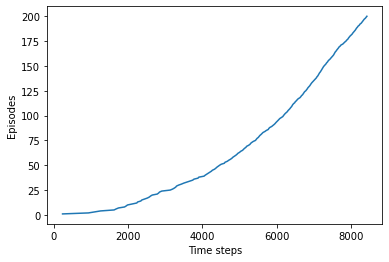

Optimal policy is:
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'D']
['R', 'R', 'R', 'D', 'R', 'R', 'R', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'L', 'L', 'L']
['R', 'R', 'L', 'R', 'U', 'U', 'U', 'U', 'U', 'R']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [7]:
figure_6_3()

## Exercise 6.9

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import trange

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# world height, world width
WORLD_HEIGHT = 7
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTION_UP_LEFT = 4
ACTION_UP_RIGHT = 5
ACTION_DOWN_LEFT = 6
ACTION_DOWN_RIGHT = 7
ACTION_STAND = 8
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]
ACTIONS_8 = [
    ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT,
    ACTION_UP_LEFT, ACTION_UP_RIGHT, ACTION_DOWN_LEFT, ACTION_DOWN_RIGHT]
ACTIONS_9 = [
    ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT,
    ACTION_UP_LEFT, ACTION_UP_RIGHT, ACTION_DOWN_LEFT, ACTION_DOWN_RIGHT,
    ACTION_STAND]
ACTIONS_FIG = [
    "↑", "↓", "←", "→",
    "↖︎", "↗︎", "↙︎", "↘︎",
    "⟲"]

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

In [3]:
START = [3, 0]
GOAL = [3, 7]

In [4]:
def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_UP_LEFT:
        return [max(i - 1 - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_UP_RIGHT:
        return [max(i - 1 - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_DOWN_LEFT:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), max(j - 1, 0)]
    elif action == ACTION_DOWN_RIGHT:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_STAND:
        return [max(i - WIND[j], 0), j]
    else:
        assert False

In [5]:
# play for an episode
def episode(q_value, action_type=4):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        if action_type == 4:
            action = np.random.choice(ACTIONS)
        elif action_type == 8:
            action = np.random.choice(ACTIONS_8)
        elif action_type == 9:
            action = np.random.choice(ACTIONS_9)
        else:
            assert False
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
    
    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            if action_type == 4:
                next_action = np.random.choice(ACTIONS)
            elif action_type == 8:
                next_action = np.random.choice(ACTIONS_8)
            elif action_type == 9:
                next_action = np.random.choice(ACTIONS_9)
            else:
                assert False
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
        
        # Sarsa update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    
    return time

In [6]:
def exercise_6_9():
    q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))
    q_value_8 = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS_8)))
    q_value_9 = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS_9)))
    
    q_values = [q_value, q_value_8, q_value_9]
    types = [4, 8, 9]
    labels = ["4 actions", "8 actions", "9 actions"]
    
    episode_limit = 500

    for q_value_, type_, label in zip(q_values, types, labels):
        np.random.set_state(random_state)
        steps = []
        for _ in trange(episode_limit):
            steps.append(episode(q_value_, action_type=type_))
        steps = np.add.accumulate(steps)
        plt.plot(steps, np.arange(1, len(steps) + 1), label=label)

    plt.xlabel("Time steps")
    plt.ylabel("Episodes")
    plt.legend()
    plt.show()

    # display the optimal policy
    for q_value_, label in zip(q_values, labels):
        optimal_policy = np.full((WORLD_HEIGHT, WORLD_WIDTH), " ").tolist()
        optimal_policy[GOAL[0]] [GOAL[1]] = "G"

        state = START
        while state != GOAL:
            best_action = np.argmax(q_value_[state[0], state[1], :])
            optimal_policy[state[0]][state[1]] = ACTIONS_FIG[best_action]

            next_state = step(state, best_action)
            state = next_state

        print("Optimal policy is:", label)
        for row in optimal_policy:
            print(row)
        print("Wind strength for each column:")
        print([str(w) for w in WIND])

100%|██████████| 500/500 [00:00<00:00, 540.28it/s]


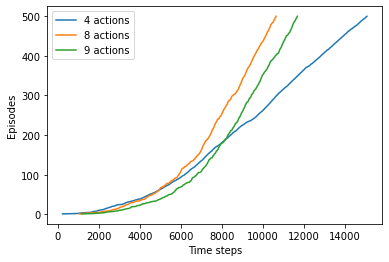

Optimal policy is: 4 actions
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '→', '→', '↓']
[' ', ' ', ' ', ' ', ' ', ' ', '→', ' ', ' ', '↓']
[' ', ' ', ' ', ' ', ' ', '→', ' ', ' ', ' ', '↓']
['↓', ' ', ' ', ' ', '→', ' ', ' ', 'G', ' ', '↓']
['→', '→', '→', '→', ' ', ' ', ' ', '↓', ' ', '↓']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '←', '←']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
Optimal policy is: 8 actions
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['↘︎', ' ', ' ', ' ', ' ', ' ', ' ', 'G', ' ', ' ']
[' ', '↘︎', ' ', ' ', ' ', ' ', '↘︎', ' ', ' ', ' ']
[' ', ' ', '↘︎', ' ', '↘︎', '→', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '→', ' ', ' ', ' ', ' ', ' ', ' ']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
Optimal policy is: 9 actions
[' ', ' ', ' ', ' ', ' ', ' ',

In [7]:
exercise_6_9()

## Exercise 6.10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import trange

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# world height, world width
WORLD_HEIGHT = 7
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTION_UP_LEFT = 4
ACTION_UP_RIGHT = 5
ACTION_DOWN_LEFT = 6
ACTION_DOWN_RIGHT = 7
ACTION_STAND = 8
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]
ACTIONS_8 = [
    ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT,
    ACTION_UP_LEFT, ACTION_UP_RIGHT, ACTION_DOWN_LEFT, ACTION_DOWN_RIGHT]
ACTIONS_9 = [
    ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT,
    ACTION_UP_LEFT, ACTION_UP_RIGHT, ACTION_DOWN_LEFT, ACTION_DOWN_RIGHT,
    ACTION_STAND]
ACTIONS_FIG = [
    "↑", "↓", "←", "→",
    "↖︎", "↗︎", "↙︎", "↘︎",
    "⟲"]

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

In [3]:
START = [3, 0]
GOAL = [3, 7]

In [4]:
def step(state, action):
    sample = np.random.sample()
    if sample < 1.0 / 3:
        add_wind = -1
    elif sample < 2.0 / 3:
        add_wind = 0
    else:
        add_wind = 1

    i, j = state

    up = max(min(i - 1 - (WIND[j] + add_wind), WORLD_HEIGHT - 1), 0)
    down = max(min(i + 1 - (WIND[j] + add_wind), WORLD_HEIGHT - 1), 0)
    stand = max(min(i - (WIND[j] + add_wind), WORLD_HEIGHT - 1), 0)
    left = max(j - 1, 0)
    right = min(j + 1, WORLD_WIDTH - 1)

    if action == ACTION_UP:
        return [up, j ]
    elif action == ACTION_DOWN:
        return [down, j]
    elif action == ACTION_LEFT:
        return [stand, left]
    elif action == ACTION_RIGHT:
        return [stand, right]
    elif action == ACTION_UP_LEFT:
        return [up, left]
    elif action == ACTION_UP_RIGHT:
        return [up, right]
    elif action == ACTION_DOWN_LEFT:
        return [down, left]
    elif action == ACTION_DOWN_RIGHT:
        return [down, right]
    elif action == ACTION_STAND:
        return [stand, j]
    else:
        assert False

In [5]:
# play for an episode
def episode(q_value, action_type=4):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        if action_type == 4:
            action = np.random.choice(ACTIONS)
        elif action_type == 8:
            action = np.random.choice(ACTIONS_8)
        elif action_type == 9:
            action = np.random.choice(ACTIONS_9)
        else:
            assert False
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
    
    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            if action_type == 4:
                next_action = np.random.choice(ACTIONS)
            elif action_type == 8:
                next_action = np.random.choice(ACTIONS_8)
            elif action_type == 9:
                next_action = np.random.choice(ACTIONS_9)
            else:
                assert False
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
        
        # Sarsa update
        q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    
    return time

In [6]:
def exercise_6_10():
    q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS)))
    q_value_8 = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS_8)))
    q_value_9 = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS_9)))
    
    q_values = [q_value, q_value_8, q_value_9]
    types = [4, 8, 9]
    labels = ["4 actions", "8 actions", "9 actions"]
    
    episode_limit = 1000

    for q_value_, type_, label in zip(q_values, types, labels):
        np.random.set_state(random_state)
        steps = []
        for _ in trange(episode_limit):
            steps.append(episode(q_value_, action_type=type_))
        steps = np.add.accumulate(steps)
        plt.plot(steps, np.arange(1, len(steps) + 1), label=label)

    plt.xlabel("Time steps")
    plt.ylabel("Episodes")
    plt.legend()
    plt.show()

    # display the optimal policy
    for q_value_, label in zip(q_values, labels):
        optimal_policy = np.full((WORLD_HEIGHT, WORLD_WIDTH), " ").tolist()
        optimal_policy[GOAL[0]] [GOAL[1]] = "G"

        state = START
        while state != GOAL:
            best_action = np.argmax(q_value_[state[0], state[1], :])
            optimal_policy[state[0]][state[1]] = ACTIONS_FIG[best_action]

            next_state = step(state, best_action)
            state = next_state

        print("Optimal policy is:", label)
        for row in optimal_policy:
            print(row)
        print("Wind strength for each column:")
        print([str(w) for w in WIND])

100%|██████████| 1000/1000 [00:04<00:00, 234.95it/s]


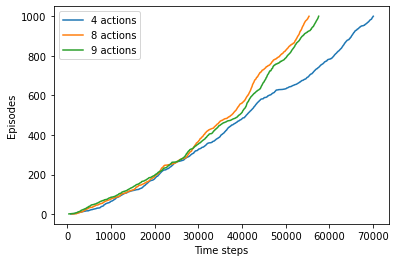

Optimal policy is: 4 actions
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '→', '→', '↓']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '↓', '↓']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '→', '→', '↓']
['→', ' ', ' ', ' ', ' ', ' ', '→', 'G', '↓', '↓']
[' ', '→', '→', ' ', ' ', ' ', ' ', ' ', '←', '↓']
[' ', ' ', ' ', '→', '→', '→', ' ', '↓', '←', '→']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '↑', '←']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
Optimal policy is: 8 actions
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['↘︎', '→', '↙︎', ' ', ' ', ' ', ' ', 'G', ' ', ' ']
[' ', '→', '↓', ' ', ' ', '→', '↘︎', ' ', ' ', ' ']
[' ', ' ', '↘︎', ' ', '↘︎', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '→', ' ', ' ', ' ', ' ', ' ', ' ']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
Optimal policy is: 9 actions
[' ', ' ', ' ', ' ', ' ', ' ',

In [7]:
exercise_6_10()